In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [15]:
data=pd.read_csv('Electric_Production.csv',index_col=0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [16]:
data.index=pd.to_datetime(data.index)

In [17]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [19]:
data.columns=['Energy Production']
data

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


Text(0.5, 1.0, 'Energy Production Per year')

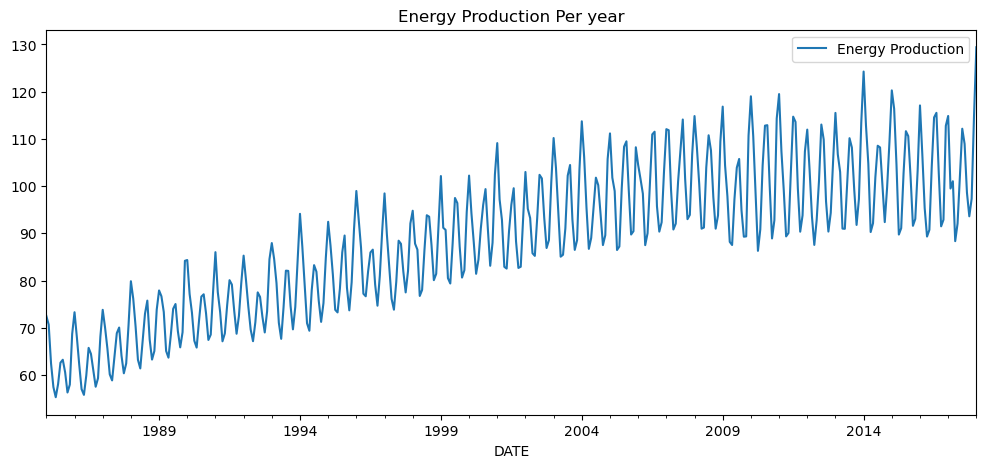

In [20]:
data.plot(figsize=(12,5))
plt.title('Energy Production Per year')

In [21]:
from statsmodels.tsa.stattools import adfuller 

In [22]:
#test for stationary
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= .05:
        print("strong evidence against the null hypothesis,reject the null,data has no unit root and its stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [24]:
adf_test(data['Energy Production'])

ADF Statistics:-2.2569903500472432
p- value: 0.18621469116586814
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


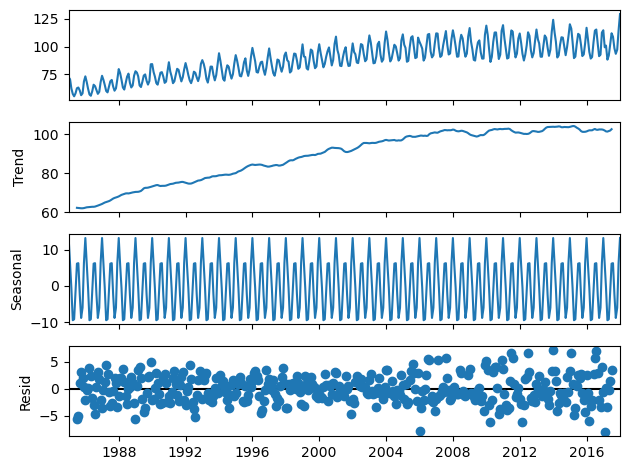

<Figure size 1500x500 with 0 Axes>

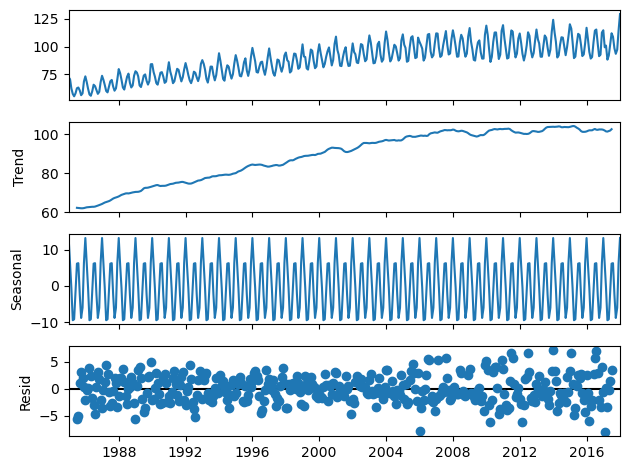

In [26]:
plt.figure(figsize=(15,5))
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data,model='additive')
result.plot()

### Holt's Winter Method

In [27]:
m=12
alpha=1/(2*m) ### m is the window size which is fixed

In [28]:
#single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [29]:
#double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [30]:
data['HWSE1']=SimpleExpSmoothing(data['Energy Production']).fit(smoothing_level=alpha).fittedvalues

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [31]:
data

,Energy Production,HWSE1
DATE,,
1985-01-01,72.5052,72.505200
1985-02-01,70.6720,72.505200
1985-03-01,62.4502,72.428817
1985-04-01,57.4714,72.013041
1985-05-01,55.3151,71.407139
...,...,...
2017-09-01,98.6154,102.442055
2017-10-01,93.6137,102.282611
2017-11-01,97.3359,101.921406


<Axes: xlabel='DATE'>

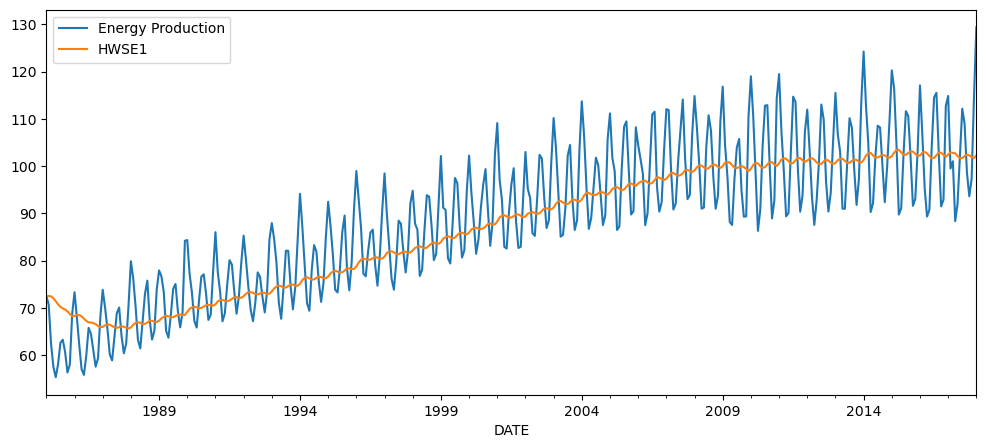

In [33]:
pd.concat([data['Energy Production'],data['HWSE1']],axis=1).plot(figsize=(12,5),legend=True)

## Double HWES

In [34]:
data['HWES_ADD']=ExponentialSmoothing(data['Energy Production'],trend='add').fit().fittedvalues

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
data['HWES_MUL']=ExponentialSmoothing(data['Energy Production'],trend='mul').fit().fittedvalues

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
data

,Energy Production,HWSE1,HWES_ADD,HWES_MUL
DATE,,,,
1985-01-01,72.5052,72.505200,70.220621,72.514558
1985-02-01,70.6720,72.505200,72.654391,72.369505
1985-03-01,62.4502,72.428817,70.823458,70.539735
1985-04-01,57.4714,72.013041,62.604630,62.333319
1985-05-01,55.3151,71.407139,57.623590,57.363828
...,...,...,...,...
2017-09-01,98.6154,102.442055,109.081877,108.727736
2017-10-01,93.6137,102.282611,98.769288,98.431199
2017-11-01,97.3359,101.921406,93.764172,93.438829


<Axes: xlabel='DATE'>

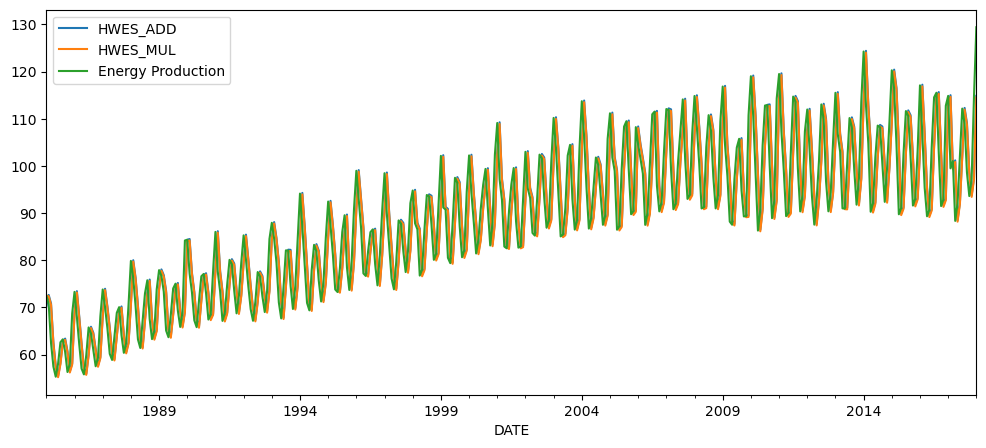

In [39]:
pd.concat([data['HWES_ADD'],data['HWES_MUL'],data['Energy Production']],axis=1).plot(figsize=(12,5),legend=True)

### TRIPLE HWES

In [41]:
data['HWES3_ADD']=ExponentialSmoothing(data['Energy Production'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
data['HWES3_MUL']=ExponentialSmoothing(data['Energy Production'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='DATE'>

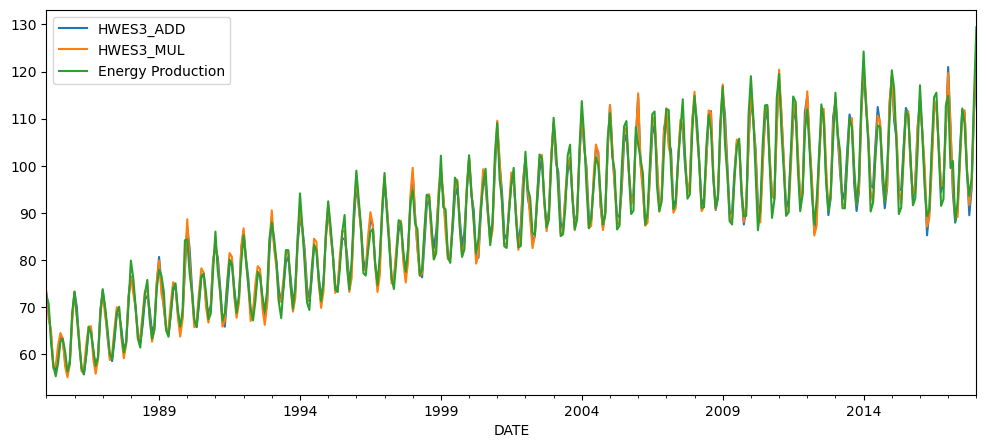

In [43]:
pd.concat([data['HWES3_ADD'],data['HWES3_MUL'],data['Energy Production']],axis=1).plot(figsize=(12,5),legend=True)

In [48]:
train=data.loc['1985-01-01':'2015-12-01']
test=data.loc['2016-01-01':]

In [49]:
len(test)

25

In [55]:
model=ExponentialSmoothing(train['Energy Production'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [56]:
## Making Prediction
predictions=model.forecast(25)

<Axes: xlabel='DATE'>

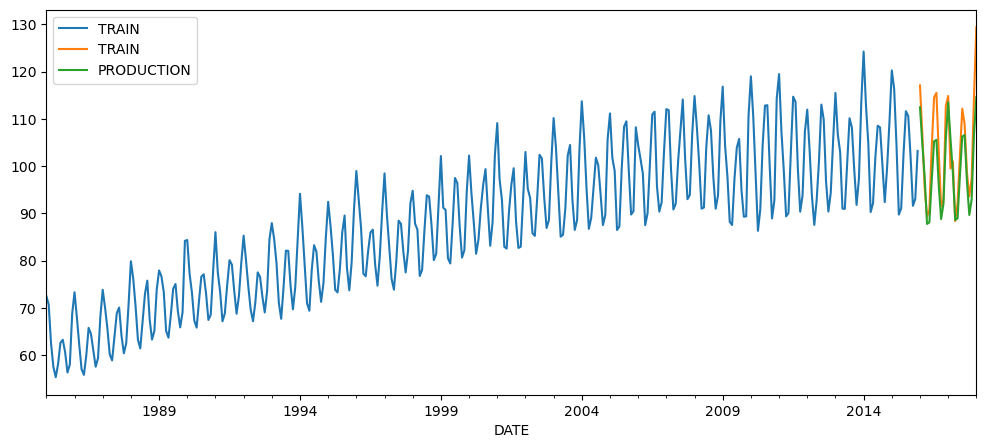

In [57]:
train['Energy Production'].plot(figsize=(12,5),legend=True,label='TRAIN')
test['Energy Production'].plot(figsize=(12,5),legend=True,label='TRAIN')
predictions.plot(figsize=(12,5),legend=True,label='PRODUCTION')

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Energy Production'],predictions))
print(rmse)

5.714051742733133
